In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

import numpy as np


df_test = pd.read_csv('test.csv')

df_train = pd.read_csv('train.csv')

#apenas exemplo de com deve ser a resposta final
df_gender_sub = pd.read_csv('gender_submission.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Não temos todas as idades, nem todas as cabines, nem 2 se foram embarcados ou não.

Text(0.5, 1.0, 'Quantidade de pessoas que sobreviveram')

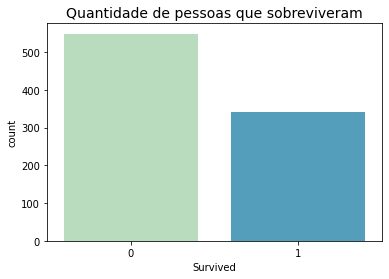

In [5]:
#quantas fraudes e quantas nao

sns.countplot('Survived', data=df_train, palette = 'GnBu')
plt.title('Quantidade de pessoas que sobreviveram', fontsize=14)

In [0]:

#vamos remover o nome das pessoas

df_train = df_train.loc[:, ~df_train.columns.isin(['Name', 'Ticket', 'Cabin'])]

df_train = pd.get_dummies(df_train)

df_train

X = df_train.loc[:, ~df_train.columns.isin(['Survived', 'PassengerId'])]

y = df_train['Survived']

In [7]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [8]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

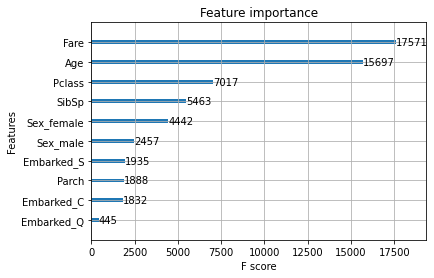

Verdadeiros positivos =  126
Verdadeiros negativos =  82
Falsos positivos =  22
Falsos negativos =  38
Acurácia: 0.78
Precisão: 0.68
Recall: 0.79
f1_score: 0.73


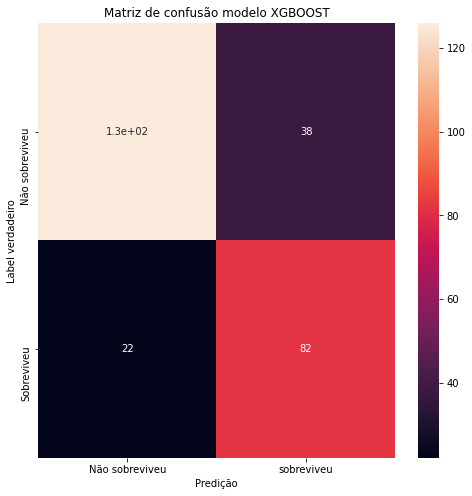

In [9]:
#agora vamos transformar o df em algo otimizado para o xgboost
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score


data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, n_estimators = 100, subsamples = 0.5, nfold=10, gamma = 0.5, verbosity = 1, booster = 'gbtree',
                reg_lambda = 3 , reg_alpha = 3, scale_pos_weight = 1.0, num_parallel_tree = 100,
                max_delta_step = 1, min_child_weight = 1)


xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

for i in range(len(preds)):

  if preds[i] >= 0.5:

    preds[i] = 1

  else:

    preds[i] = 0

accuracy = accuracy_score(y_test, preds)


xgb.plot_importance(xg_reg)


plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


conf_matrix = confusion_matrix(y_test, preds)

#tn, fp, fn, tp = conf_matrix.ravel()

tp = conf_matrix[0,0]
fp = conf_matrix[1,0]
tn = conf_matrix[1,1]
fn = conf_matrix[0,1]


print('Verdadeiros positivos = ', tp)
print('Verdadeiros negativos = ', tn)
print('Falsos positivos = ', fp)
print('Falsos negativos = ', fn)


plt.subplots(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax);

ax.set_xlabel('Predição');ax.set_ylabel('Label verdadeiro'); 
ax.set_title('Matriz de confusão modelo XGBOOST'); 
ax.xaxis.set_ticklabels(['Não sobreviveu', 'sobreviveu']); ax.yaxis.set_ticklabels(['Não sobreviveu', 'Sobreviveu']);


print("Acurácia: %.2f" % metrics.accuracy_score(y_test, preds))
print("Precisão: %.2f" % metrics.precision_score(y_test, preds))
print("Recall: %.2f" % metrics.recall_score(y_test, preds))
print("f1_score: %.2f" % metrics.f1_score(y_test, preds))


In [0]:
df_test

#vamos remover o nome das pessoas

df_test = df_test.loc[:, ~df_test.columns.isin(['Name', 'Ticket', 'Cabin'])]

df_test = pd.get_dummies(df_test)

df_test

X = df_test.loc[:, ~df_test.columns.isin(['Survived', 'PassengerId'])]

In [11]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,NaN,0,0,8.0500,0,1,0,0,1


In [12]:
preds2 = xg_reg.predict(X)


for i in range(len(preds2)):

  if preds2[i] >= 0.5:

    preds2[i] = round(1)

  else:

    preds2[i] = round(0)


print(len(preds2))

418


In [13]:
df_gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [14]:
preds2

preds2 = preds2.astype(np.int)

print(type(preds2[0]))

<class 'numpy.int64'>


In [15]:
df_gender_sub['Survived'] = preds2

df_gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:


file_name = 'answer.csv'

df_gender_sub.to_csv(file_name, index = False)

from google.colab import files

files.download("answer.csv")

